A* Search Path: [0, 2, 3]
Execution time: 0.000271 seconds
Current memory usage: 1.02 KB
Peak memory usage: 1.02 KB


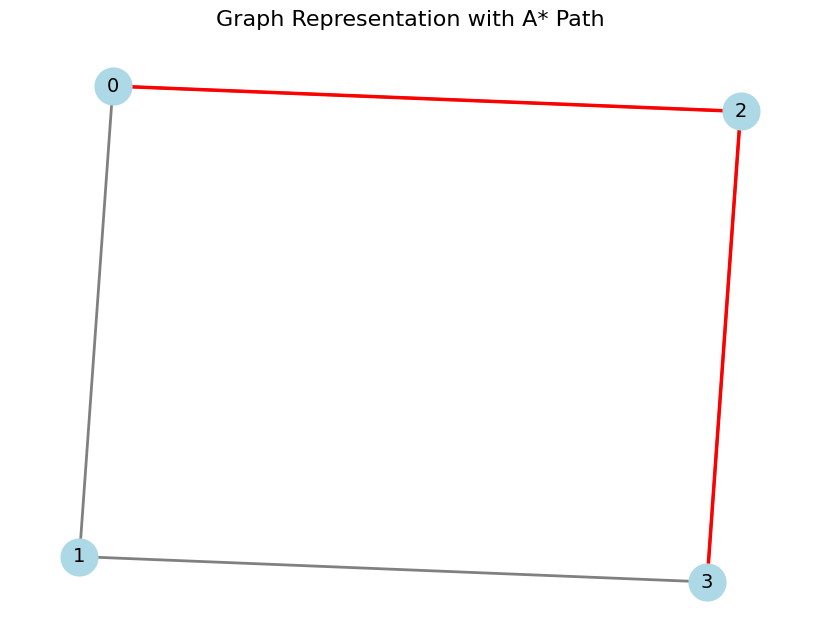

In [2]:
import numpy as np
import time
import tracemalloc
import networkx as nx
import matplotlib.pyplot as plt


def a_star(graph, start, goal):
    open_set = {start}
    closed_set = set()
    g_score = np.full(graph.shape[0], np.inf)
    g_score[start] = 0
    f_score = np.full(graph.shape[0], np.inf)
    f_score[start] = heuristic(start, goal)
    came_from = {}

    # Start measuring execution time and memory usage
    start_time = time.time()
    tracemalloc.start()

    while open_set:
        current = min(open_set, key=lambda node: f_score[node])
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()

            # Stop measuring execution time and memory usage
            snapshot = tracemalloc.take_snapshot()
            end_time = time.time()
            current_mem, peak_mem = tracemalloc.get_traced_memory()

            print("A* Search Path:", path)
            print(f"Execution time: {end_time - start_time:.6f} seconds")
            print(f"Current memory usage: {current_mem / 10**3:.2f} KB")
            print(f"Peak memory usage: {peak_mem / 10**3:.2f} KB")
            tracemalloc.stop()

            return path

        open_set.remove(current)
        closed_set.add(current)

        neighbors = np.where(graph[current] == 1)[0]
        for neighbor in neighbors:
            if neighbor in closed_set:
                continue
            tentative_g_score = g_score[current] + 1

            if neighbor not in open_set:
                open_set.add(neighbor)
            elif tentative_g_score >= g_score[neighbor]:
                continue

            came_from[neighbor] = current
            g_score[neighbor] = tentative_g_score
            f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)

    print("No path found.")
    return []


def heuristic(node, goal):
    return abs(node - goal)


# Example usage:
graph = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]
])

start_node = 0
goal_node = 3

# Perform A* search
path = a_star(graph, start_node, goal_node)

# Visualization
G = nx.Graph()

# Add edges based on adjacency matrix
for i in range(graph.shape[0]):
    for j in range(i + 1, graph.shape[1]):
        if graph[i, j] == 1:
            G.add_edge(i, j)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using a spring layout
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=14, edge_color="gray", width=2)

# Highlight the path
if path:
    edges_in_path = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color="red", width=2.5)

plt.title("Graph Representation with A* Path", fontsize=16)
plt.show()